In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


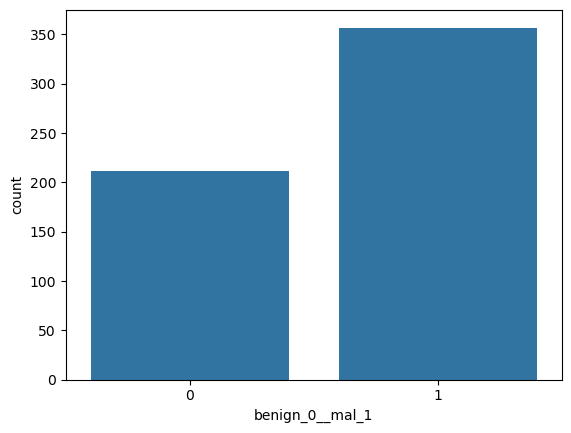

In [30]:
sns.countplot(df, x='benign_0__mal_1');

In [31]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

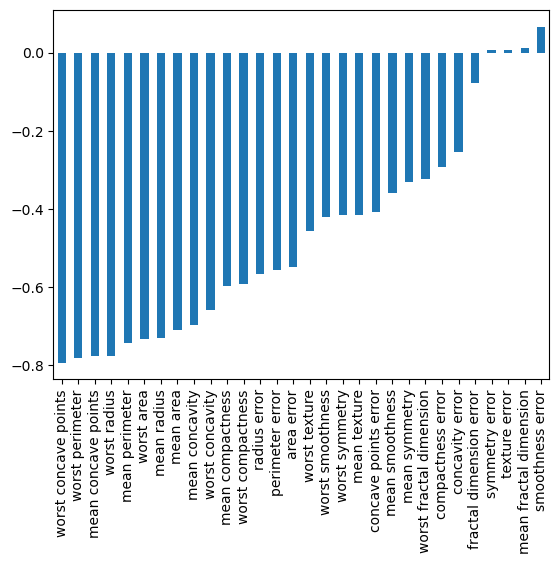

In [32]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

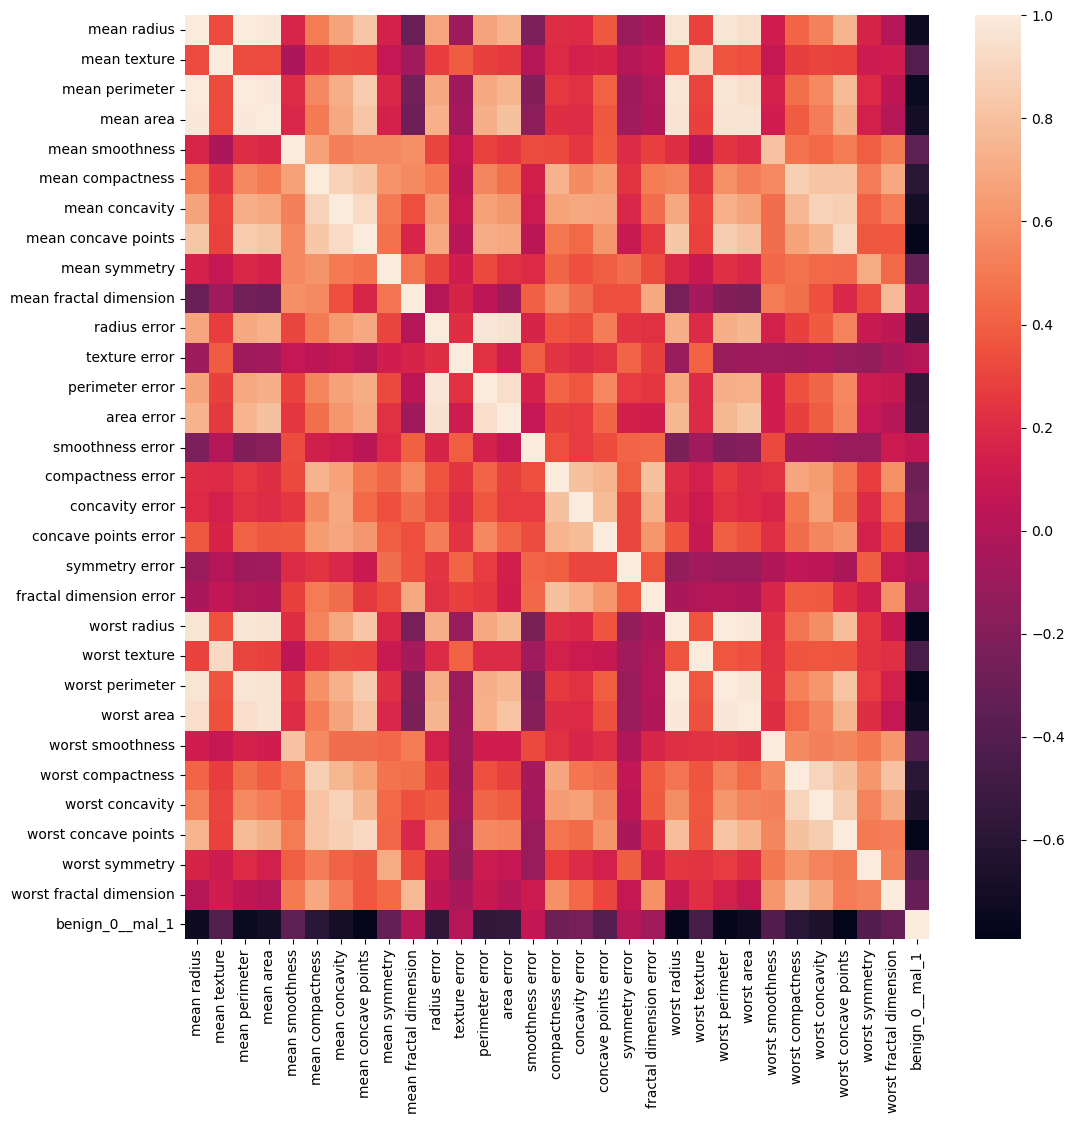

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr());

In [34]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_train.shape

(426, 30)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.6757 - val_loss: 0.6605
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6432 - val_loss: 0.6350
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6260 - val_loss: 0.6089
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5947 - val_loss: 0.5786
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5627 - val_loss: 0.5451
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5373 - val_loss: 0.5083
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4982 - val_loss: 0.4640
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4431 - val_loss: 0.4157
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4048 - val_loss: 0.3688
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3463 - val_loss: 0.3278
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3224 - val_loss: 0.2912
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

In [45]:
model.history.history

{'loss': [0.6699615120887756,
  0.643068253993988,
  0.6169358491897583,
  0.5897010564804077,
  0.5577858090400696,
  0.5222941040992737,
  0.4826544523239136,
  0.4353697896003723,
  0.39051663875579834,
  0.3485807180404663,
  0.3139505386352539,
  0.28244513273239136,
  0.25477471947669983,
  0.23079094290733337,
  0.21183978021144867,
  0.19578798115253448,
  0.18187041580677032,
  0.17321284115314484,
  0.16013914346694946,
  0.1517598181962967,
  0.14305272698402405,
  0.13596069812774658,
  0.12866167724132538,
  0.12359344959259033,
  0.11855313181877136,
  0.11352349072694778,
  0.10787977278232574,
  0.10323412716388702,
  0.09882116317749023,
  0.09673617035150528,
  0.0921853631734848,
  0.08909109979867935,
  0.08615754544734955,
  0.08454031497240067,
  0.08350801467895508,
  0.08162282407283783,
  0.07884331047534943,
  0.07642485946416855,
  0.07795263826847076,
  0.07672108709812164,
  0.07450547814369202,
  0.07245789468288422,
  0.06940101832151413,
  0.068093754351

In [46]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.669962,0.660495
1,0.643068,0.635019
2,0.616936,0.608916
3,0.589701,0.578637
4,0.557786,0.545106


<Axes: >

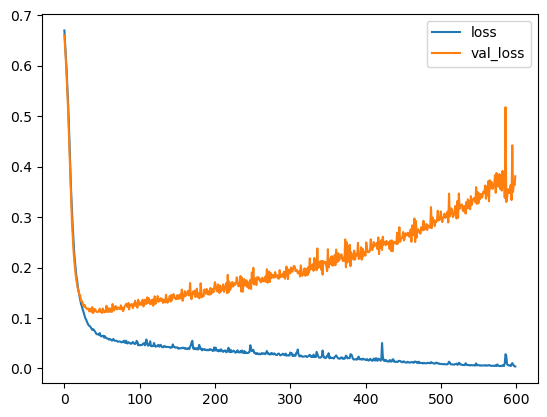

In [47]:
losses.plot()  #overfitting

In [48]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [51]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=early_stop)

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.6620 - val_loss: 0.6483
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6385 - val_loss: 0.6167
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5997 - val_loss: 0.5742
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5400 - val_loss: 0.5211
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5026 - val_loss: 0.4665
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4354 - val_loss: 0.4172
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3994 - val_loss: 0.3719
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3666 - val_loss: 0.3249
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3449 - val_loss: 0.2849
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2787 - val_loss: 0.2534
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2577 - val_loss: 0.2303
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

In [52]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.658161,0.648320
1,0.625690,0.616666
2,0.588961,0.574246
3,0.542441,0.521132
4,0.488169,0.466500


<Axes: >

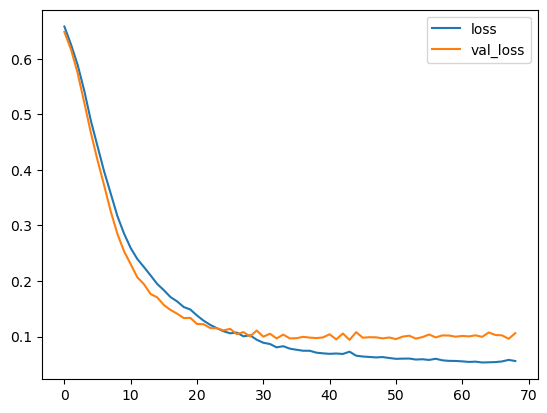

In [53]:
model_loss.plot()

In [54]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [56]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=early_stop)

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.6846 - val_loss: 0.6672
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6910 - val_loss: 0.6478
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6715 - val_loss: 0.6334
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6480 - val_loss: 0.6182
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6426 - val_loss: 0.6020
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6148 - val_loss: 0.5846
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6194 - val_loss: 0.5653
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6033 - val_loss: 0.5440
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5623 - val_loss: 0.5168
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5410 - val_loss: 0.4895
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5663 - val_loss: 0.4664
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

In [62]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.687867,0.667235
1,0.683834,0.647782
2,0.665407,0.633434
3,0.643352,0.618230
4,0.630378,0.601969


<Axes: >

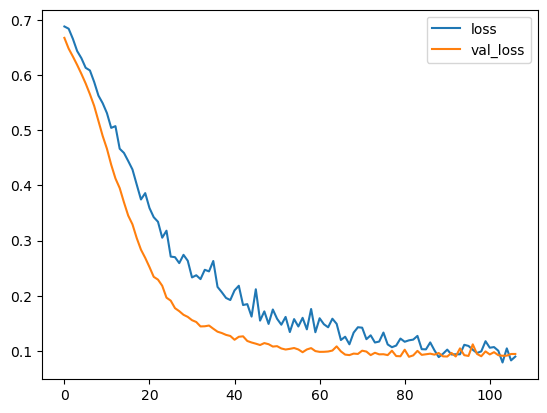

In [63]:
model_loss.plot()

In [70]:
predictions = model.predict(X_test)
predictions

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[9.8851669e-01],
       [9.9084044e-01],
       [9.9347949e-01],
       [7.0137479e-03],
       [9.9926090e-01],
       [9.9896455e-01],
       [9.9902719e-01],
       [1.5315629e-06],
       [9.9615288e-01],
       [9.9708641e-01],
       [1.1556167e-03],
       [9.9268878e-01],
       [9.5529377e-01],
       [9.9901611e-01],
       [5.7131134e-04],
       [9.9916971e-01],
       [9.9164867e-01],
       [9.9913210e-01],
       [2.8640466e-06],
       [8.9337572e-02],
       [9.7590333e-01],
       [9.9841493e-01],
       [9.8999929e-01],
       [9.9852532e-01],
       [1.5382936e-03],
       [9.2613858e-01],
       [2.0708227e-04],
       [9.9983150e-01],
       [3.4839625e-04],
       [6.5130168e-03],
       [3.4914434e-01],
       [3.7494779e-03],
       [6.8676627e-01],
       [1.7330106e-01],
       [9.9892604e-01],
       [9.9942237e-01],
       [1.2496930e-02],
       [5.7414886e-02],
       [1.1539615e-04],
       [2.7765200e-06],
       [3.7972541e-03],
       [9.889750

In [71]:
pred_class = (predictions > 0.5).astype(int)
pred_class

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [74]:
print(confusion_matrix(y_test, pred_class))

[[54  1]
 [ 3 85]]
